In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")

from google.colab import files
files.upload()  # Upload Customer_Segmentation.csv

df = pd.read_csv("Customer_Segmentation.csv")
df.head()


Saving Customer_Segmentation.csv to Customer_Segmentation.csv


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,49,81235,35
1,2,Female,56,69240,87
2,3,Male,49,80726,81
3,4,Male,21,25492,90
4,5,Male,47,116279,8


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


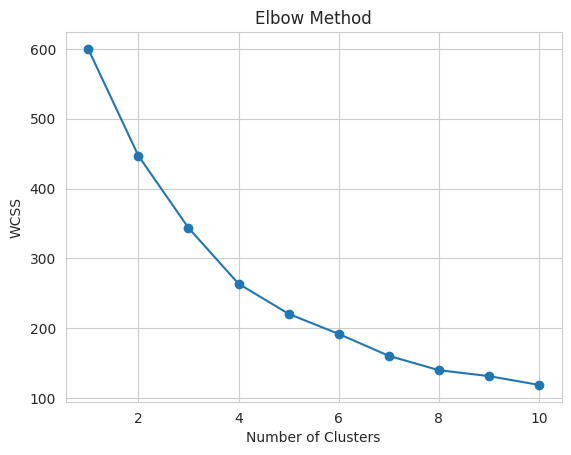

In [3]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]
X.head()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


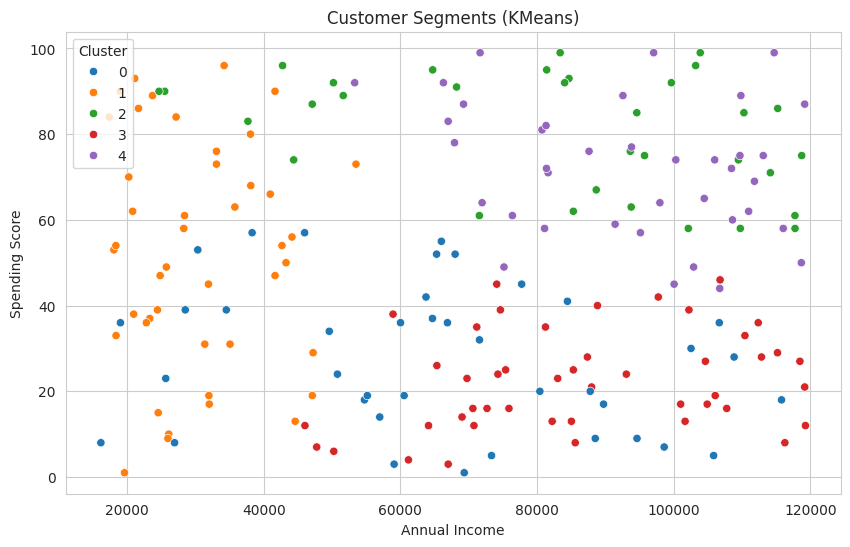

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['Annual_Income'],
    y=df['Spending_Score'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segments (KMeans)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
